In [1]:
import os
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import warnings
#warnings.filterwarnings("ignore", category=FutureWarning)

DATA_PATH = 'data'
SAVED_MODEL_PATH = 'saved_model'

In [2]:
# loading data
df2 = pd.read_csv(os.path.join(DATA_PATH,'chatbot.csv') )
df2.shape

(16973, 2)

In [3]:
df2['label'].unique()

array(['ACCOUNT', 'CONTACT', 'INVOICES', 'ORDER', 'PAYMENT'], dtype=object)

In [4]:
pd.DataFrame(df2.label.unique())

,0
0,ACCOUNT
1,CONTACT
2,INVOICES
3,ORDER
4,PAYMENT


In [5]:
df2['category_id'] = df2['label'].factorize()[0]
category_id_df = df2[['label', 'category_id']].drop_duplicates()

category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'label']].values)

df2.head()

,text,label,category_id
0,"I don't have an online account, what do I have...",ACCOUNT,0
1,can you tell me if i can regisger two accounts...,ACCOUNT,0
2,"I have no online account, open one, please",ACCOUNT,0
3,"could you ask an agent how to open an account,...",ACCOUNT,0
4,"i want an online account, create one",ACCOUNT,0


In [6]:
def preprocess(text : str):
    # for this case will only use case folding
    text = text.lower()
    return text

df2['text'] = df2['text'].apply(lambda x: preprocess(x))
df2.head()

,text,label,category_id
0,"i don't have an online account, what do i have...",ACCOUNT,0
1,can you tell me if i can regisger two accounts...,ACCOUNT,0
2,"i have no online account, open one, please",ACCOUNT,0
3,"could you ask an agent how to open an account,...",ACCOUNT,0
4,"i want an online account, create one",ACCOUNT,0


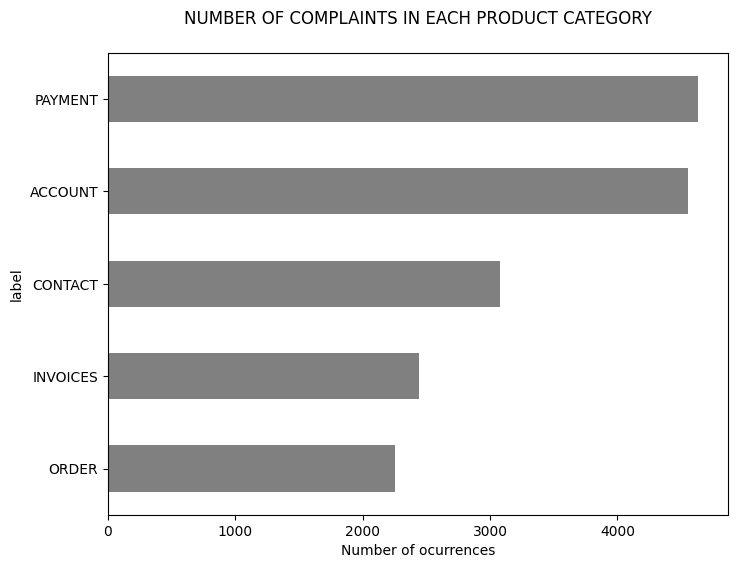

In [11]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('label').text.count().sort_values().plot.barh(
    ylim=0, color=colors, title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

In [12]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.text).toarray()

labels = df2.category_id

In [13]:
X = df2['text'] # Collection of documents
y = df2['label'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

In [15]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

In [17]:
features

array([[0.        , 0.21977641, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.29631262, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [16]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LogisticRegression,0.986272,0.012366
MultinomialNB,0.964709,0.023523
RandomForestClassifier,0.735160,0.066014


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LogisticRegression().fit(tfidf_vectorizer_vectors, y_train)

# only train with 0.75 dataset, because later on still want to check model metrics when use this

In [60]:
X_train

6346     can u ask an agent if i can send an email to c...
4493                        i want to use my other profile
5437        i want to see the phone no of customer service
10573                    i made a mistake, change my order
10225                  tell me if i can change my purchase
                               ...                        
9225         i want information about seeing some invoices
13123    can u ask an agent where i can report issues p...
9845             i want to ge a bill, tell me how to do it
10799    could you tell me if i could modify my order, ...
2732                     i want to close my online account
Name: text, Length: 12729, dtype: object

In [26]:
# print(tfidf_vectorizer_vectors)

In [35]:
model.classes_

array(['ACCOUNT', 'CONTACT', 'INVOICES', 'ORDER', 'PAYMENT'], dtype=object)

In [13]:
y_train.unique()

array(['CONTACT', 'ACCOUNT', 'ORDER', 'INVOICES', 'PAYMENT'], dtype=object)

In [54]:
X_train

6346     can u ask an agent if i can send an email to c...
4493                        i want to use my other profile
5437        i want to see the phone no of customer service
10573                    i made a mistake, change my order
10225                  tell me if i can change my purchase
                               ...                        
9225         i want information about seeing some invoices
13123    can u ask an agent where i can report issues p...
9845             i want to ge a bill, tell me how to do it
10799    could you tell me if i could modify my order, ...
2732                     i want to close my online account
Name: text, Length: 12729, dtype: object

Let's see what is the classification that our model gives to this new complaint.

In [113]:
new_complaint = """help i forgot"""

In [114]:
x = fitted_vectorizer.transform([new_complaint])
print(x)

  (0, 317)	0.4629669745021088
  (0, 257)	0.8863755301904288


In [115]:
model.predict(x)

array(['ACCOUNT'], dtype=object)

In [116]:
def find_word_from_idx(test_list):
    res = []
    for val in test_list:
        for k,v in fitted_vectorizer.vocabulary_.items():
            if v==val:
                res.append(k)
                break
    return res
    # break
    
find_word_from_idx([317, 257])

['help', 'forgot']

In [40]:
print(x)

  (0, 615)	0.7918243227025181
  (0, 613)	0.4546498272666287
  (0, 317)	0.40780850474594477


In [37]:
path_saved_model = os.path.join(os.getcwd(),SAVED_MODEL_PATH)
if not os.path.exists(path_saved_model):
    os.makedirs(path_saved_model)

In [121]:
import pickle

# pickle.dump(fitted_vectorizer, open(os.path.join(path_saved_model,'chatbot_tfidf_vectorizer.pkl'), "wb"))
# pickle.dump(model, open(os.path.join(path_saved_model,'chatbot_model.pkl'), "wb"))

In [122]:
path_saved_model

'c:\\Users\\Andrey\\Documents\\rakamin\\rakamin_chatbot_sentiment_analysis\\chatbot\\saved_model'

In [123]:
loaded_vectorizer = pickle.load(open(os.path.join(path_saved_model,'chatbot_tfidf_vectorizer.pkl'),'rb'))
loaded_model = pickle.load(open(os.path.join(path_saved_model,'chatbot_model.pkl'),'rb'))

In [132]:
new_complaint = 'help help help help cannot access my invoice'
x = loaded_vectorizer.transform([new_complaint])
print(x)
print(loaded_model.predict_proba(x))
print(loaded_model.classes_)

  (0, 422)	0.49364966987160935
  (0, 317)	0.8696608554118388
[[0.01758826 0.0105855  0.9465413  0.00891716 0.01636778]]
['ACCOUNT' 'CONTACT' 'INVOICES' 'ORDER' 'PAYMENT']


In [41]:
x = loaded_vectorizer.transform([new_complaint])
print(x)

In [42]:
loaded_vectorizer.vocabulary_['payment']

667

In [31]:
model.predict_proba(x)

array([[5.50885292e-05, 6.12201353e-05, 3.63889610e-05, 4.63764010e-05,
        9.99800926e-01]])

In [94]:
model.predict(x)

array(['PAYMENT'], dtype=object)

In [73]:
loaded_model.predict_proba(x)

array([[0.09001804, 0.02860934, 0.01953955, 0.53909297, 0.3227401 ]])